In [2]:
# define id (full id account)
INSTANCE_ID = '042dbf75-1db4-48af-aa2c-beee173d3339'  
# aldready inputted into config file. In case you put instance ID into cofniguration file you can leave this unchanged

In [3]:
# option settings
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [9]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np
import datetime
import warnings
from sentinelhub import WmsRequest, WcsRequest, MimeType, CRS, BBox, CustomUrlParam, DataSource

# warning settings


In [77]:
### define functions

# function for plotting RGB images
def plot_image(data, factor=1):
    """
    Utility function for plotting RGB images. The numpy arrays returned by the WMS and WCS requests have channels
    ordered as Blue (`B02`), Green (`B03`), and Red (`B04`) therefore the order has to be reversed before ploting
    the image.
    """
    fig = plt.subplots(nrows=1, ncols=1, figsize=(16, 10))
    rgb = data.astype(np.float32)
    if len(rgb.shape) == 3 and rgb.shape[2] == 3:
        rgb = rgb[..., [2, 1, 0]]
    plt.imshow(rgb * factor)

In [122]:
# define coordinate of chosen point
# always specify -> BBox([lng_1, lat_1, lng_2, lat_2]
via_santo_domingo_wgs84 = [-79.10, -0.30, -79.20, -0.40]
# betsiboka_coords_wgs84 = [46.16, -16.15, 46.51, -15.58]

# define bounding box
via_santo_domingo_bbox = BBox(bbox=via_santo_domingo_wgs84, crs=CRS.WGS84)
# betsiboka_bbox = BBox(bbox=betsiboka_coords_wgs84, crs=CRS.WGS84)

/anaconda/lib/python3.6/site-packages/sentinelhub/common.py:56: UserWarning: Since sentinelhub version 2.0.0 the order of coordinates for BBox in CRS.WGS84 has been reversed from latitide-longitude to longitude-latitude. Please make sure to initialize bounding box with BBox([lng_1, lat_1, lng_2, lat_2], CRS.WGS84). The order of coordinates in other coordinate reference systems has not changed.
  warnings.warn(message)


In [129]:
# define options for image request  
wms_true_color_request = WmsRequest(layer='TRUE_COLOR',
                                    # bbox=betsiboka_bbox,
                                    bbox=via_santo_domingo_bbox,
                                    time='latest',
                                    # time=('2018-01-01', '2018-04-30'), 
                                    maxcc=0.2, 
                                    width=512, height=856,
                                    instance_id=INSTANCE_ID)

# pull request
wms_true_color_img = wms_true_color_request.get_data()

In [130]:
# enquire date of image
# print('The latest Sentinel-2 image of this area was taken on {}.'.format(wms_true_color_request.get_dates()[-1]))

In [131]:
# enquire number of available images for date range
print('There are %d Sentinel-2 images available for requested period.' % len(wms_true_color_img))

There are 1 Sentinel-2 images available for requested period.


In [132]:
# enquire dates of images
print('These %d images were taken on the following dates:' % len(wms_true_color_img))
for index, date in enumerate(wms_true_color_request.get_dates()):
    print(' - image %d was taken on %s' % (index, date))

These 1 images were taken on the following dates:
 - image 0 was taken on 2018-04-17 15:40:48


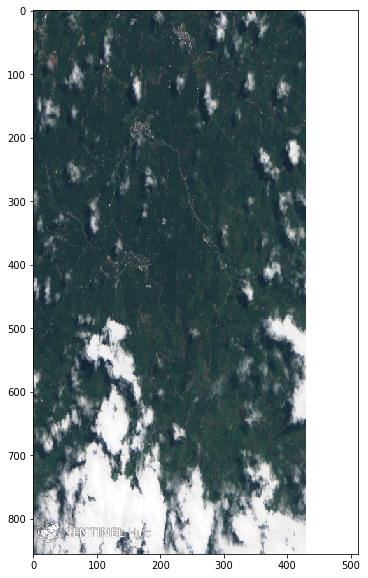

In [135]:
# plot image
plot_image(wms_true_color_img[-1], 1./255)

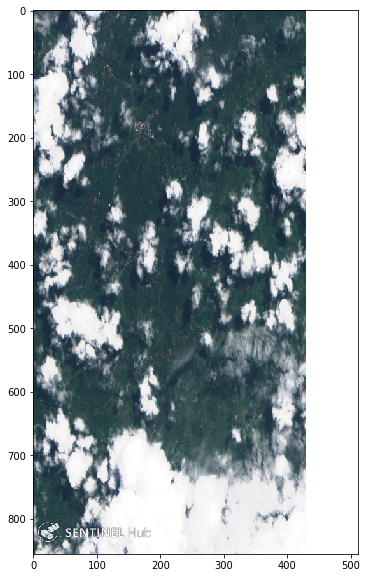

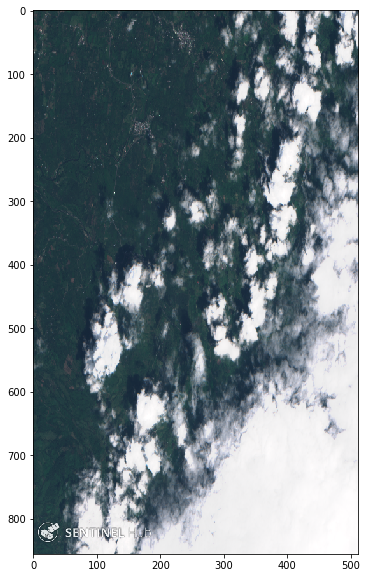

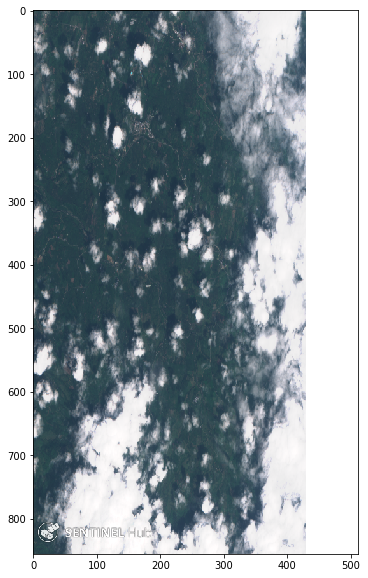

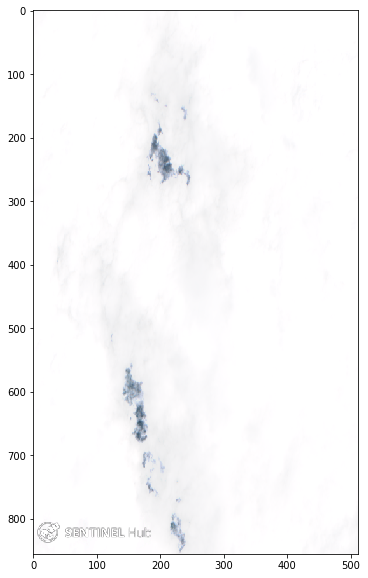

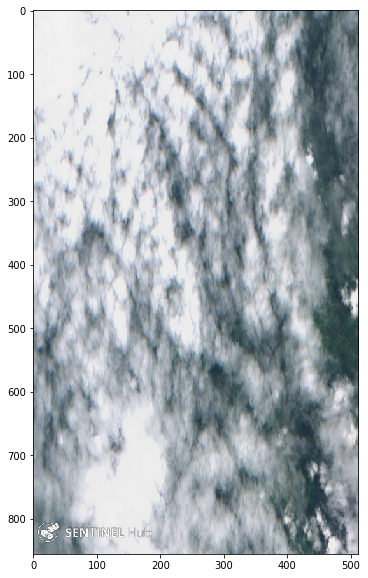

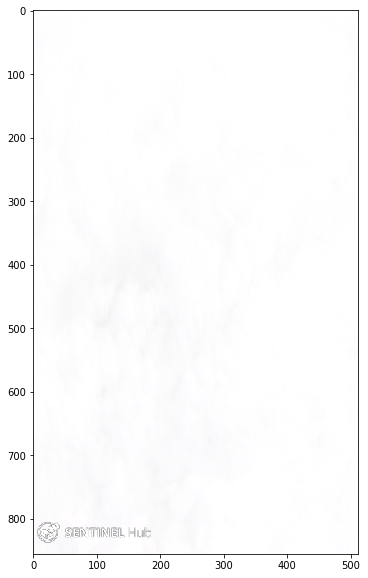

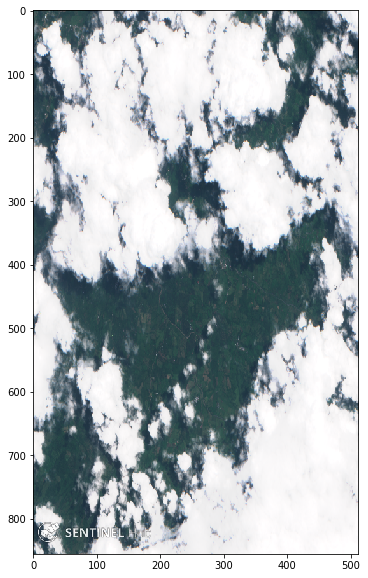

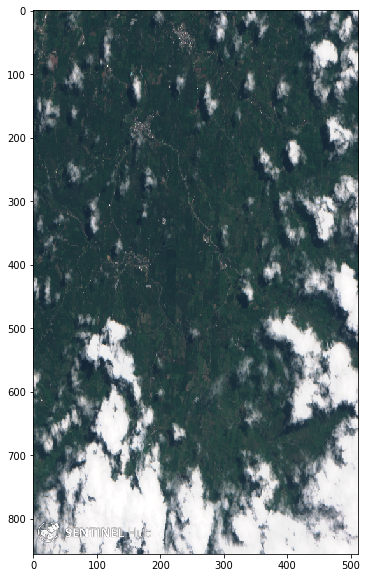

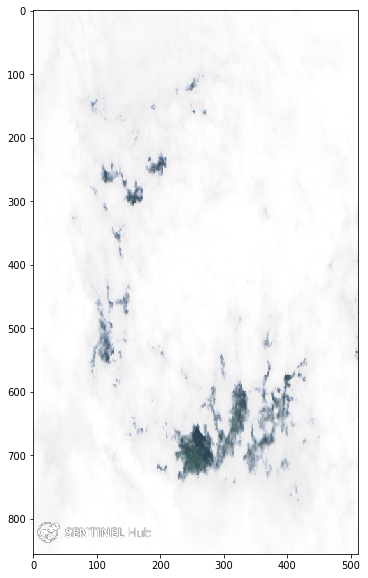

In [128]:
# plot all images in list -> redefine plot_image function to get side-by-side
for i in range(0, len(wms_true_color_img)):
    plot_image(wms_true_color_img[(i-1)], 1./255)